In [1]:
%matplotlib inline
import numpy as np 
import pandas as pd
import seaborn as s
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn import svm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
#optimum parameter choosing 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle
import os 
import warnings
warnings.filterwarnings('ignore')

In [2]:
os.chdir ('C:\\Users\\mahes\\OneDrive\\Desktop\\New folder (4)')
data = pd.read_csv('data.csv')
display (data)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [4]:
diagnosis_unique = data.diagnosis.unique()

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='diagnosis', ylabel='count'>

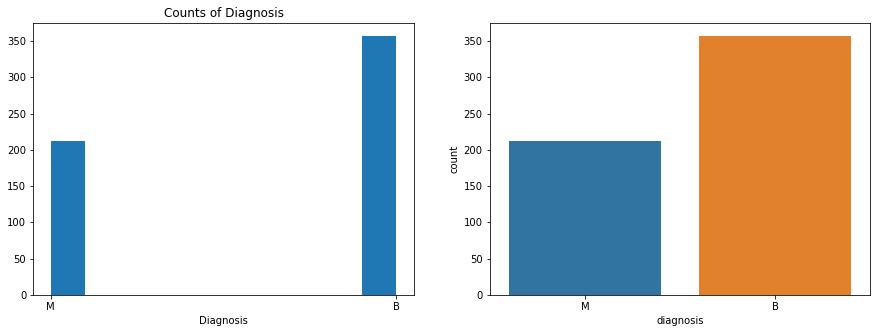

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.hist( data.diagnosis)
plt.title("Counts of Diagnosis")
plt.xlabel("Diagnosis")


plt.subplot(1, 2, 2)

sns.countplot('diagnosis', data=data)

<IPython.core.display.Javascript object>

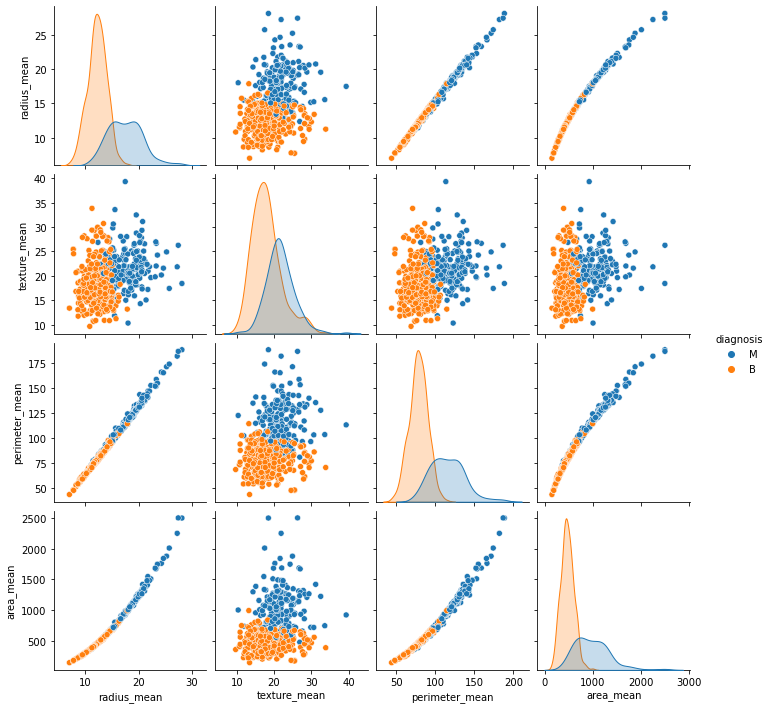

In [6]:
cols = ["diagnosis", "radius_mean", "texture_mean", "perimeter_mean", "area_mean"]

sns.pairplot(data[cols], hue="diagnosis")
plt.show()

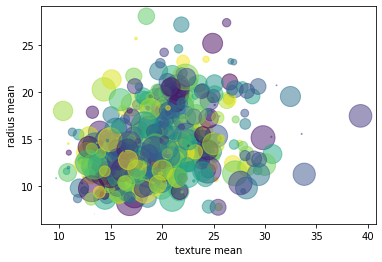

In [7]:
size = len(data['texture_mean'])

area = np.pi * (15 * np.random.rand( size ))**2
colors = np.random.rand( size )

plt.xlabel("texture mean")
plt.ylabel("radius mean") 
plt.scatter(data['texture_mean'], data['radius_mean'], s=area, c=colors, alpha=0.5);

In [8]:
from sklearn.preprocessing import LabelEncoder


In [9]:
print(data.diagnosis.value_counts())
print("\n", data.diagnosis.value_counts().sum())

B    357
M    212
Name: diagnosis, dtype: int64

 569


In [10]:
cols = ['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']
print(len(cols))
data[cols].corr()

11


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [11]:
x= data.drop ('diagnosis',axis =1).drop('id',axis =1)
y = data['diagnosis']


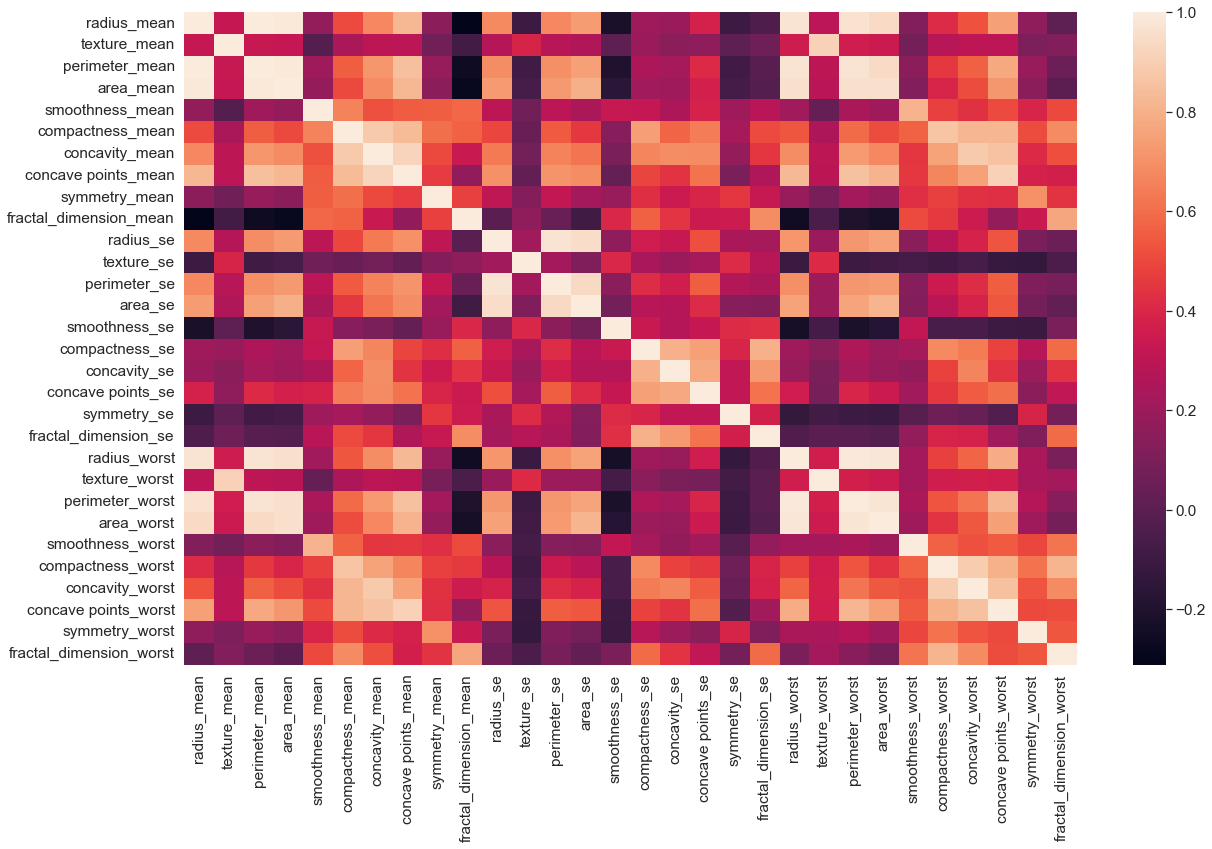

In [12]:
x_norm = (x- x.mean()) / (x.max()- x.min())
x_norm= pd.concat ([x_norm,y], axis =1 )

co_rel= x_norm.corr()
plt.rcParams['figure.figsize']=(20,12)
s.set(font_scale=1.4)
# In co relation 1 is the highest and -1 is lowest
s.heatmap (co_rel)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [14]:
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier



In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

from sklearn.metrics import classification_report

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_validate, cross_val_score

from sklearn.svm import SVC

from sklearn import metrics

In [16]:
data["diagnosis"]=data["diagnosis"].map({'M':1,'B':0})

In [17]:
prediction_feature = [ "radius_mean",  'perimeter_mean', 'area_mean', 'symmetry_mean', 'compactness_mean', 'concave points_mean']

targeted_feature = 'diagnosis'

len(prediction_feature)

6

In [18]:
X = data[prediction_feature]
X

,radius_mean,perimeter_mean,area_mean,symmetry_mean,compactness_mean,concave points_mean
0,17.99,122.80,1001.0,0.2419,0.27760,0.14710
1,20.57,132.90,1326.0,0.1812,0.07864,0.07017
2,19.69,130.00,1203.0,0.2069,0.15990,0.12790
3,11.42,77.58,386.1,0.2597,0.28390,0.10520
4,20.29,135.10,1297.0,0.1809,0.13280,0.10430
...,...,...,...,...,...,...
564,21.56,142.00,1479.0,0.1726,0.11590,0.13890
565,20.13,131.20,1261.0,0.1752,0.10340,0.09791
566,16.60,108.30,858.1,0.1590,0.10230,0.05302
567,20.60,140.10,1265.0,0.2397,0.27700,0.15200


In [19]:
y = data.diagnosis
y


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=15)

print(X_train)


     radius_mean  perimeter_mean  area_mean  symmetry_mean  compactness_mean  \
274        17.93          115.20      998.9         0.1538           0.07027   
189        12.30           78.83      463.7         0.1667           0.07253   
158        12.06           76.84      448.6         0.1590           0.05241   
257        15.32          103.20      713.3         0.2398           0.22840   
486        14.64           94.21      666.0         0.1409           0.06698   
..           ...             ...        ...            ...               ...   
85         18.46          121.10     1075.0         0.2132           0.10530   
199        14.45           94.49      642.7         0.1950           0.12060   
156        17.68          117.40      963.7         0.1971           0.16650   
384        13.28           85.79      541.8         0.1617           0.08575   
456        11.63           74.87      415.1         0.1799           0.08574   

     concave points_mean  
274         

In [21]:
def model_building(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(predictions, y_test)
    
    return (score, accuracy, predictions)    

In [22]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [23]:
models_list = {
    "LogisticRegression" :  LogisticRegression(),
    "RandomForestClassifier" :  RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=5),
    "DecisionTreeClassifier" :  DecisionTreeClassifier(criterion='entropy', random_state=0),
    "SVC" :  SVC(),
    "XGBoost" : XGBClassifier(objective='reg:linear', colsample_bytree= 0.3,learning_rate=0.1,max_depth=5,alpha=10,n_estimator=100),
    "GaussianNB" : GaussianNB()

}

In [24]:
def cm_metrix_graph(cm):
    
    sns.heatmap(cm,annot=True,fmt="d")
    plt.show()
        

In [25]:
df_prediction = []
confusion_matrixs = []
df_prediction_cols = [ 'model_name', 'score', 'accuracy_score' , "accuracy_percentage"]

for name, model in zip(list(models_list.keys()), list(models_list.values())):
    
    (score, accuracy, predictions) = model_building(model, X_train, X_test, y_train, y_test )
    
    print("\n\nClassification Report of '"+ str(name), "'\n")
    
    print(classification_report(y_test, predictions))

    df_prediction.append([name, score, accuracy, "{0:.2%}".format(accuracy)])
    
    confusion_matrixs.append(confusion_matrix(y_test, predictions))
    
        
df_pred = pd.DataFrame(df_prediction, columns=df_prediction_cols)




Classification Report of 'LogisticRegression '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy                           0.91       188
   macro avg       0.91      0.90      0.90       188
weighted avg       0.91      0.91      0.91       188



Classification Report of 'RandomForestClassifier '

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       115
           1       0.93      0.88      0.90        73

    accuracy                           0.93       188
   macro avg       0.93      0.92      0.92       188
weighted avg       0.93      0.93      0.93       188



Classification Report of 'DecisionTreeClassifier '

              precision    recall  f1-score   support

           0       0.90      0.96      0.93       115
           1       0.92      0.84      0.88        73

    accuracy            

In [26]:
df_pred

,model_name,score,accuracy_score,accuracy_percentage
0,LogisticRegression,0.916010,0.909574,90.96%
1,RandomForestClassifier,0.992126,0.925532,92.55%
2,DecisionTreeClassifier,1.000000,0.909574,90.96%
3,SVC,0.923885,0.914894,91.49%
4,XGBoost,0.923885,0.888298,88.83%
5,GaussianNB,0.918635,0.904255,90.43%


In [27]:
def Fit_val_scorring(model):
    
    model.fit(data[prediction_feature], data[targeted_feature])

    predictions = model.predict(data[prediction_feature])    
    accuracy = accuracy_score(predictions, data[targeted_feature])
    print("\nFull-Data Accuracy:", round(accuracy, 2))
    print("Cross Validation Score of'"+ str(name), "'\n")
    
    
    kFold = KFold(n_splits=5) 
    
    
    err = []
    
    for train_index, test_index in kFold.split(data):
        X_train = data[prediction_feature].iloc[train_index, :] 
        y_train = data[targeted_feature].iloc[train_index] 
        
        X_test = data[prediction_feature].iloc[test_index, :]
        y_test = data[targeted_feature].iloc[test_index] 
        
        model.fit(X_train, y_train)

        err.append(model.score(X_train, y_train))
        
        print("Score:", round(np.mean(err),  2) )

In [28]:
for name, model in zip(list(models_list.keys()), list(models_list.values())):
    Fit_val_scorring(model)


Full-Data Accuracy: 0.9
Cross Validation Score of'LogisticRegression '

Score: 0.91
Score: 0.91
Score: 0.9
Score: 0.9
Score: 0.9

Full-Data Accuracy: 1.0
Cross Validation Score of'RandomForestClassifier '

Score: 0.99
Score: 0.99
Score: 0.99
Score: 1.0
Score: 1.0

Full-Data Accuracy: 1.0
Cross Validation Score of'DecisionTreeClassifier '

Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0
Score: 1.0

Full-Data Accuracy: 0.89
Cross Validation Score of'SVC '

Score: 0.9
Score: 0.89
Score: 0.88
Score: 0.88
Score: 0.88
[20:14:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:14:36] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimator" } are not used.


Full-Data Accuracy: 0.92
Cross Validation Score of'X

In [29]:
model = DecisionTreeClassifier()

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

gsc = GridSearchCV(model, param_grid, cv=10) 

gsc.fit(X_train, y_train) 

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9289473684210525

 Best Estinator is 
DecisionTreeClassifier(max_features='log2', min_samples_leaf=6,
                       min_samples_split=3)

 Best Parametes are
{'max_features': 'log2', 'min_samples_leaf': 6, 'min_samples_split': 3}


In [30]:
model = KNeighborsClassifier()

param_grid = {
    'n_neighbors': list(range(1, 30)),
    'leaf_size': list(range(1,30)),
    'weights': [ 'distance', 'uniform' ]
}


gsc = GridSearchCV(model, param_grid, cv=10)


gsc.fit(X_train, y_train)

print("\n Best Score is ")
print(gsc.best_score_)

print("\n Best Estinator is ")
print(gsc.best_estimator_)

print("\n Best Parametes are")
print(gsc.best_params_)


 Best Score is 
0.9159244264507423

 Best Estinator is 
KNeighborsClassifier(leaf_size=1, n_neighbors=10)

 Best Parametes are
{'leaf_size': 1, 'n_neighbors': 10, 'weights': 'uniform'}


In [32]:
import pickle as pkl

In [37]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)
pkl.dump(logistic_model, open('logistic_model.pkl', 'wb'))

In [38]:
loaded_model = pkl.load(open('logistic_model.pkl', 'rb'))
result = loaded_model.score(X_test, y_test)

In [39]:
result

0.9095744680851063